In [11]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
from imageio import imread
import os

In [ ]:
# # Código para buscar o png no meu computador
# import os

# # Caminho base do script
# base_dir = os.getcwd()

# # Buscar recursivamente pelo arquivo
# for root, dirs, files in os.walk(base_dir):
#     if "ladybug.png" in files:
#         print("Imagem encontrada em:", os.path.join(root, "ladybug.png"))
#         break
# else:
#     print("Imagem não encontrada.")


In [ ]:
image = imread(os.path.join("ladybug.png"))

array([[[0.09803922, 0.11372549, 0.00784314],
        [0.09411765, 0.10980392, 0.00392157],
        [0.09411765, 0.11372549, 0.        ],
        ...,
        [0.22352941, 0.4117647 , 0.08235294],
        [0.21960784, 0.40392157, 0.08627451],
        [0.20392157, 0.3882353 , 0.07450981]],

       [[0.09411765, 0.10980392, 0.00392157],
        [0.09019608, 0.10588235, 0.        ],
        [0.09019608, 0.10588235, 0.        ],
        ...,
        [0.23529412, 0.42352942, 0.08627451],
        [0.23137255, 0.41568628, 0.09803922],
        [0.21568628, 0.4       , 0.08627451]],

       [[0.09019608, 0.10588235, 0.00784314],
        [0.08627451, 0.10196079, 0.00392157],
        [0.08627451, 0.10196079, 0.        ],
        ...,
        [0.25882354, 0.44705883, 0.10980392],
        [0.24705882, 0.43529412, 0.10588235],
        [0.22745098, 0.4117647 , 0.09411765]],

       ...,

       [[0.05490196, 0.07058824, 0.00392157],
        [0.05490196, 0.07058824, 0.00392157],
        [0.05098039, 0

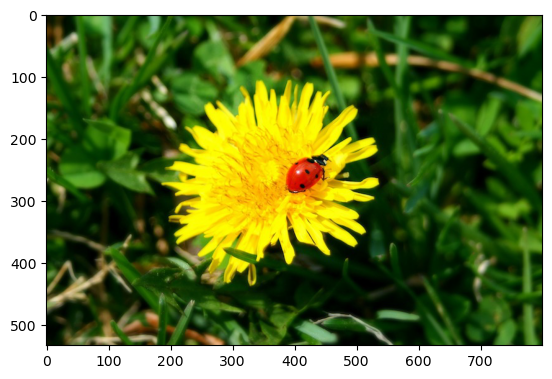

In [ ]:
# Expondo a imagem
plt.imshow(image) #
plt.imread('ladybug.png') #array de cada pixel da imagem

In [28]:
image.shape

(533, 800, 3)

In [37]:
X= image.reshape(-1,3) # O -1 faz com que o NumPy automaticamente calcule o número correto de linhas para manter todos os pixels da imagem.
print(f'shape: {X.shape}') # no caso tenho 426400 linhas (pixels) de array com 3 valores dentro dele (RGB)
print(f'array: \n{X}')

shape: (426400, 3)
array: 
[[25 29  2]
 [24 28  1]
 [24 29  0]
 ...
 [10 58  0]
 [ 5 52  0]
 [ 2 48  0]]


https://stackoverflow.com/questions/51245877/image-segregation-by-k-mean-python

In [56]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=8).fit(X)

In [48]:
(kmeans.cluster_centers_[kmeans.labels_]).shape # pegando o centro de cada cluster

(426400, 3)

In [ ]:
kmeans.cluster_centers_[[3,1,1,3]] # -> é isso que o codigo de cima está fazendo (sem o .shape, claro)

array([[0.01829857, 0.09828666, 0.00525271],
       [0.07562816, 0.22181334, 0.01236198],
       [0.07562816, 0.22181334, 0.01236198],
       [0.01829857, 0.09828666, 0.00525271]], dtype=float32)

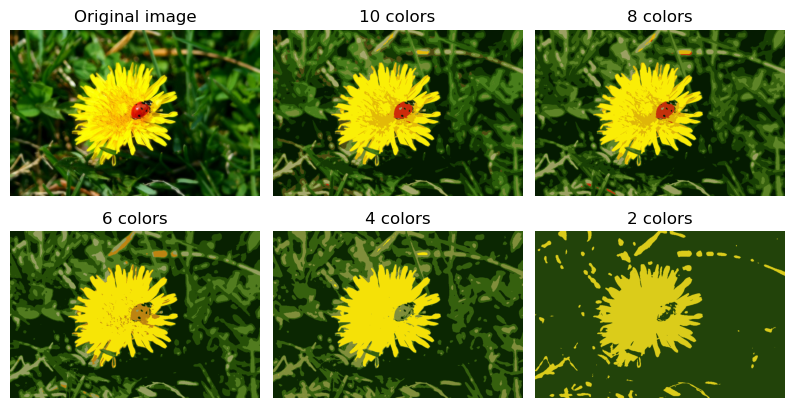

In [62]:
from matplotlib.image import imread #import module
#image = imread(os.path.join("images","unsupervised_learning","ladybug.png")) #Read Image
image = imread(os.path.join("ladybug.png"))
image.shape #Get shape of image, which is height, width and channel(colours)
X = image.reshape(-1, 3) #Reshaping to have a 2D (pixels in one row instead of width and height + the 3 columns referring to the RGB)
kmeans = KMeans(n_clusters=8, random_state=42).fit(X) #Applying and fitting K-means clustering
segmented_img = kmeans.cluster_centers_[kmeans.labels_] #centres of the 8 clusters made
segmented_img = segmented_img.reshape(image.shape) #reshape them using the changed image shape (original)
segmented_imgs = []
n_colors = (10, 8, 6, 4, 2)
for n_clusters in n_colors:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(X) #Applyting kmeans for each colour, using 10,8,6.... as number of clusters
    segmented_img = kmeans.cluster_centers_[kmeans.labels_] #Repeating as mentioned above
    segmented_imgs.append(segmented_img.reshape(image.shape))
#print(segmented_imgs) # aqui tenho as 5 imagens (uma pra cada quantidade de cluster)
plt.figure(figsize=(10,5)) #Plotting code
plt.subplots_adjust(wspace=0.05, hspace=0.1)
plt.subplot(231)
plt.imshow(image)
plt.title("Original image")
plt.axis('off')
for idx, n_clusters in enumerate(n_colors):
   plt.subplot(232 + idx)
   plt.imshow(segmented_imgs[idx])
   plt.title("{} colors".format(n_clusters))
   plt.axis('off')
plt.show()

quando usamos 2 clusters, ele captura basicamente apenas as cores amarelas e verde, enquanto nos 10 clusters já há mais clusters com outros segmentos de cores (10)